In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBRFClassifier

In [122]:
passenger_train = pd.read_csv('train.csv')
passenger_test = pd.read_csv('test.csv')

unused_columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Parch']

imp = SimpleImputer(strategy='most_frequent')
for col in passenger_train.columns:
    imp.fit(passenger_train[[col]])
    passenger_train[[col]] = imp.transform(passenger_train[[col]])
    if col in passenger_test.columns:
        passenger_test[[col]] = imp.transform(passenger_test[[col]])

X_ptr = passenger_train[[col for col in passenger_train.columns if col not in unused_columns]].values
X_pts = passenger_test[[col for col in passenger_test.columns if col not in unused_columns]].values
y_ptr = passenger_train['Survived'].values

X_ptr = X_ptr.transpose()
X_pts = X_pts.transpose()

str_col = [i for i in range(len(X_ptr)) if type(X_ptr[i][0]) == str]

enc = LabelEncoder()
for col in str_col:
    enc.fit(X_ptr[col])
    X_ptr[col] = enc.transform(X_ptr[col])
    
for col in str_col:
    enc.fit(X_pts[col])
    X_pts[col] = enc.transform(X_pts[col])

X_ptr = X_ptr.transpose()
X_pts = X_pts.transpose()

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_ptr, y_ptr, test_size=0.3, random_state=2)

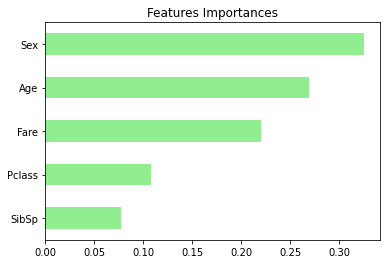

0.8059701492537313


In [124]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Draw tree segment
# plot_tree(dtc)
# plt.show()

# Create a pd.Series of features importances
importances = pd.Series(data=dtc.feature_importances_,
                        index=[col for col in passenger_train.columns if col not in unused_columns])

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

y_pred = dtc.predict(X_test)
percent = len([i for i in range(len(y_test)) if y_test[i] != y_pred[i]]) / len(y_test)
print(1 - percent)

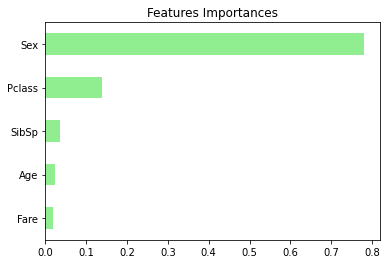

0.8097014925373134


In [131]:
xgbrfc = XGBRFClassifier(learning_rate=0.00025)
xgbrfc.fit(X_train, y_train)

# Draw tree segment
# plot_tree(xgbrfc)
# plt.show()

# Create a pd.Series of features importances
importances = pd.Series(data=xgbrfc.feature_importances_,
                        index=[col for col in passenger_train.columns if col not in unused_columns])

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

y_pred = xgbrfc.predict(X_test)
percent = len([i for i in range(len(y_test)) if y_test[i] != y_pred[i]]) / len(y_test)
print(1 - percent)

In [142]:
y_submit = xgbrfc.predict(X_pts)

df = pd.DataFrame({'PassengerId':passenger_test['PassengerId'].values, 'Survived':y_submit})
df = df.set_index('PassengerId')
df.to_csv('result.csv')